In [1]:
from generative_example import get_real_data_preprocessed
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

2022-12-14 21:01:39.593379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 21:01:43.899570: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-14 21:01:49.813652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 21:01:49.813885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such 

In [2]:
X, y = get_real_data_preprocessed()
print(X.shape)
print(y.shape)
print(X[0])
print(y[0])
print(len(X[0]))

(50000,)
(50000,)
b''
0
0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import random

In [10]:
data = pd.read_csv("./gen.csv")


In [5]:
X = data["review"].values.astype('U')
y = data["label"]
vectorizer = CountVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=785743
)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [6]:
vocab = vectorizer.get_feature_names_out()


In [7]:
np.random.choice(vocab, 10, replace=True)

array(['shuffled', 'premium', 'hardware', 'hindersome', 'favelas',
       'misogyny', 'postcard', 'integrity', 'missteps', 'oversees'],
      dtype=object)

In [8]:
word_prob = np.exp(model.feature_log_prob_)

In [9]:
word_prob.shape

(2, 40974)

In [17]:
word_prob[1]

array([2.93307600e-06, 5.86615201e-06, 9.77692002e-07, ...,
       1.95538400e-06, 1.95538400e-06, 1.95538400e-06])

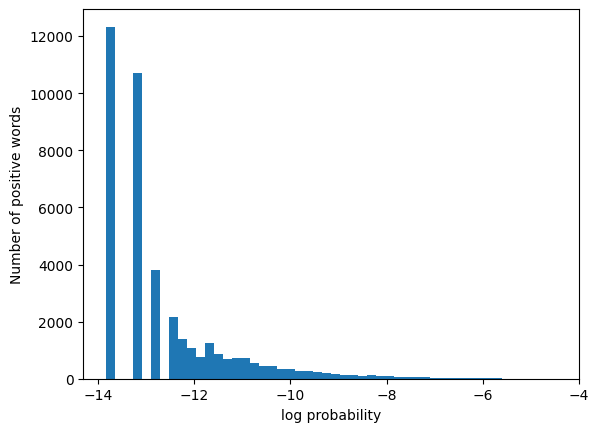

In [21]:
# plot review length
# plt.hist([len(x) for x in X], bins=50)
plt.hist([np.log(pos_prob) for pos_prob in word_prob[1]], bins=50)
plt.xlabel("log probability")
plt.ylabel("Number of positive words")
plt.show()

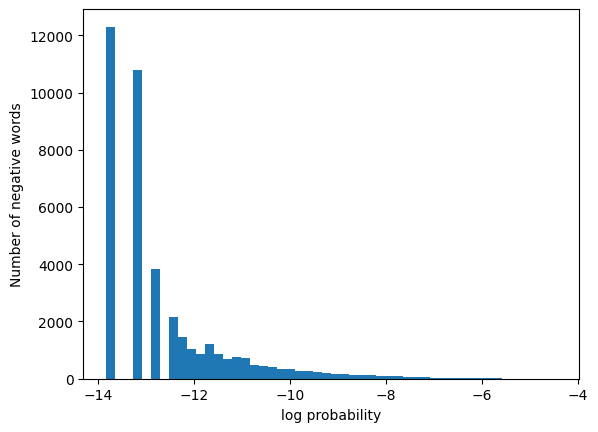

In [22]:
plt.hist([np.log(neg_prob) for neg_prob in word_prob[0]], bins=50)
plt.xlabel("log probability")
plt.ylabel("Number of negative words")
plt.show()

In [49]:
prob_diff = np.abs(word_prob[1] - word_prob[0])

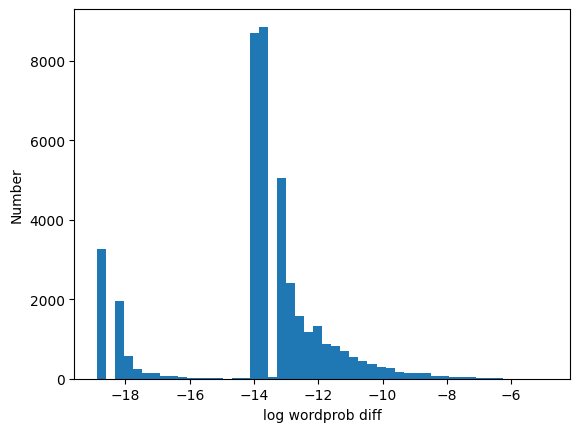

In [50]:
plt.hist([np.log(pd) for pd in prob_diff], bins=50)
plt.xlabel("log wordprob diff")
plt.ylabel("Number")
plt.show()

In [44]:
# get the words that prob is less than 1e-12
neg_words = [vocab[i] for i, wp in enumerate(word_prob[0]) if np.log(wp) > -6]

In [39]:
print(neg_words)

[]


In [45]:
pos_words = [vocab[i] for i, wp in enumerate(word_prob[1]) if np.log(wp) > -6]

In [48]:
len(pos_words), len(neg_words)

(45, 52)

In [46]:
len(set(pos_words).intersection(set(neg_words)))

39

In [47]:
# set(pos_words).intersection(set(neg_words))

{'actually',
 'also',
 'back',
 'bad',
 'best',
 'better',
 'even',
 'ever',
 'find',
 'first',
 'funny',
 'get',
 'go',
 'going',
 'good',
 'great',
 'however',
 'know',
 'like',
 'little',
 'long',
 'made',
 'make',
 'makes',
 'many',
 'much',
 'never',
 'old',
 're',
 'real',
 'really',
 'say',
 'see',
 'still',
 'think',
 've',
 'watch',
 'watching',
 'well'}

In [29]:
neg_words[:10]

['00', '000', '0000000000001', '00015', '001', '007', '01', '0148', '02', '03']

In [16]:
word_prob[0]

array([2.91424258e-06, 2.91424258e-06, 9.71414194e-07, ...,
       2.91424258e-06, 9.71414194e-07, 9.71414194e-07])

In [27]:
# remove the words that prob is less than 1e-12
word_prob[0] = [wp for wp in word_prob[0] if np.log(wp) > np.exp(-12)]
word_prob[1] = [wp for wp in word_prob[1] if np.log(wp) > np.exp(-12)]

ValueError: could not broadcast input array from shape (0,) into shape (40974,)

In [11]:
pos1 = random.choices(vocab, word_prob[1], k = 10)

In [12]:
pos1

['wonderfully',
 'rooting',
 'coz',
 'turns',
 'teacher',
 'side',
 'looking',
 'including',
 'work',
 'also']

In [5]:
vectorizer = CountVectorizer()
vectorizer.fit(X)
X_v = vectorizer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_v, y, test_size=0.5, random_state=0, stratify=y
)


In [6]:
# print(vectorizer.get_feature_names(),0)

In [7]:
# print(X_v.toarray().shape)
# 50000 sentence, 69122 unique words

In [8]:
# np.set_printoptions(threshold=sys.maxsize)


In [9]:
# print(X.toarray()[0])

In [10]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [11]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.89376
0.84548


In [12]:
model_1 = MultinomialNB()
model_1.fit(X_train, y_train)

MultinomialNB()

In [13]:
print(model_1.score(X_train, y_train))
print(model_1.score(X_test, y_test))

0.89636
0.84832


In [14]:
model.feature_log_prob_

array([[-7.64188444, -9.43364391, -9.43364391, ..., -8.74049673,
        -9.43364391, -9.43364391],
       [-8.74049673, -9.43364391, -8.74049673, ..., -9.43364391,
        -9.43364391, -9.43364391]])

In [15]:
model.feature_log_prob_.shape

(2, 69122)

In [16]:
prob = np.exp(model.feature_log_prob_)

In [17]:
# prob

In [18]:
model.class_count_

array([12500., 12500.])

In [19]:
np.exp(model.class_log_prior_)

array([0.5, 0.5])

In [20]:
first_feature = bernoulli.rvs(np.exp(model.feature_log_prob_[0, 0]), size=1000)

In [21]:
from sklearn.datasets import make_classification

In [22]:
Xg, yg = make_classification(1000, n_features=69122)

In [23]:
print(model.score(Xg, yg))


0.5


In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
sns.set()

In [25]:
predicted_labels = model.predict(X_train)

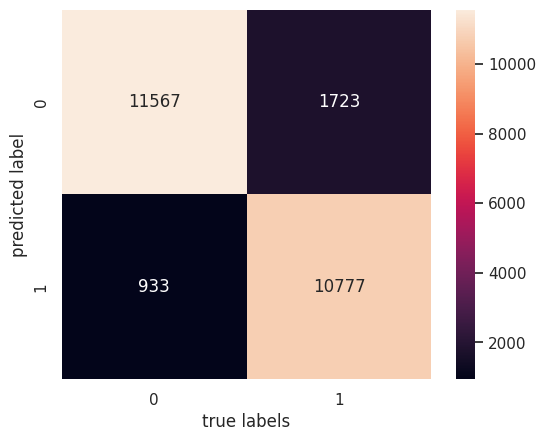

The accuracy is 0.894
The F1 score is 0.890


In [26]:
# plot the confusion matrix
mat = confusion_matrix(y_train, predicted_labels)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print(f"The accuracy is {accuracy_score(y_train, predicted_labels):.3f}")
print(f"The F1 score is {f1_score(y_train, predicted_labels):.3f}")

In [27]:
# show all the tokens in the positive class
pos_class_prob_sorted = model.feature_log_prob_[1, :].argsort()
print(np.take(vectorizer.get_feature_names(), pos_class_prob_sorted[-20:]))

['much' 'even' 'realli' 'would' 'also' 'love' 'well' 'charact' 'get'
 'stori' 'watch' 'great' 'make' 'good' 'see' 'time' 'like' 'one' 'movi'
 'film']


/home/codespace/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
# show all the tokens in the negative class
neg_class_prob_sorted = model.feature_log_prob_[0, :].argsort()
print(np.take(vectorizer.get_feature_names(), neg_class_prob_sorted[-20:]))

['scene' 'much' 'dont' 'look' 'act' 'realli' 'charact' 'see' 'would' 'bad'
 'good' 'get' 'time' 'even' 'watch' 'make' 'like' 'one' 'film' 'movi']


In [29]:
print(np.take(vectorizer.get_feature_names(), 1000))

ahuntin


In [7]:
import pandas as pd
df = pd.read_csv("no_stops_reviews.csv")


In [14]:
len(df["review"][0])

212

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
real_df = pd.read_csv("imdb_master.csv", encoding="latin-1")

In [2]:
Xr = real_df["review"].values.astype('U')
yr = real_df["label"]

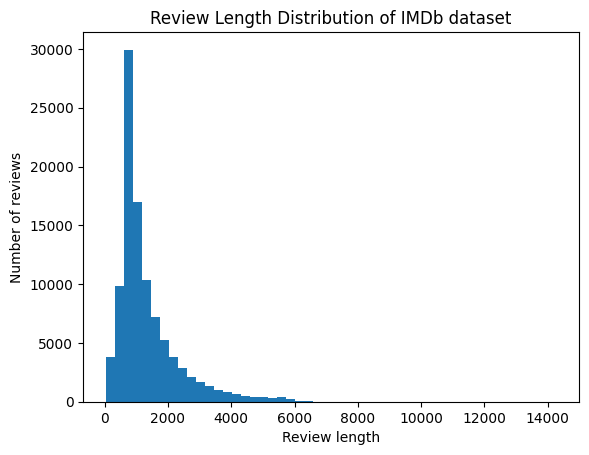

In [6]:
plt.hist([len(str(x)) for x in real_df["review"]], bins=50)
plt.title("Review Length Distribution of IMDb dataset")
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

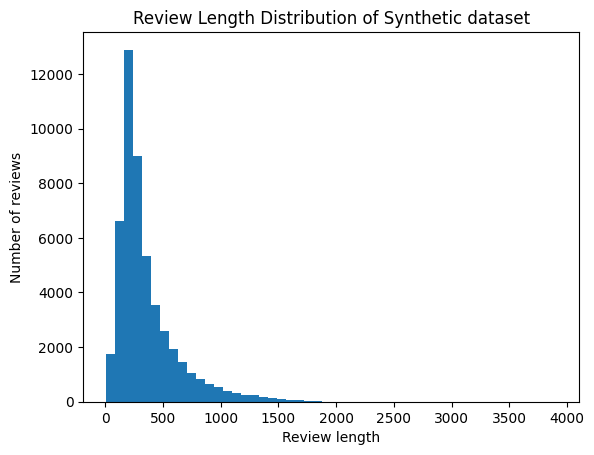

In [8]:
# plot review length
# plt.hist([len(x) for x in X], bins=50)
plt.hist([len(str(x)) for x in df["review"]], bins=50)
plt.title("Review Length Distribution of Synthetic dataset")
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()